In [1]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units

import metpy.calc as mpcalc

from glidar_model.convection_model import ModelParams
from glidar_model.parcel_profile import CachedParcelProfile, ParcelProfile, ParcelProfileBuilder, SimpleParcelProfile
from glidar_model.synthetic_profile import SyntheticProfileBuilder, SyntheticProfileParams
from glidar_model.sounding_profile import SoundingProfileBuilder

In [8]:
mp = ModelParams(10 * units.celsius, 1 * units.delta_degree_Celsius,
                       1 * units.celsius, 0.5 * units.delta_degree_Celsius,
                       100 * units.meter, 0, 0, 0)

t = 9 * units.celsius
dp = 0 * units.celsius
h = 1000 * units.meter
dpi = -15 * units.celsius
ti = 3 * units.delta_degree_Celsius

params = SyntheticProfileParams(t, ti, h, dp, dpi)
builder = SyntheticProfileBuilder()

profile =  builder.get_profile(params)

parcel = SimpleParcelProfile(profile.pressure).get_profile(mp)
adjust = SoundingProfileBuilder(profile).get_profile(mp)


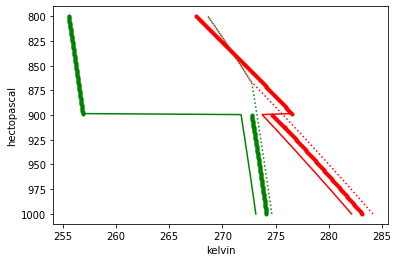

In [11]:
plt.plot(figsize=(10,10))

plt.plot(profile.temperature, profile.pressure, 'r-', label='temperature')
plt.plot(profile.dewpoint, profile.pressure, 'g-', label = 'dewpoint')

plt.plot(parcel.temperature, parcel.pressure, 'r:', label='temperature')
plt.plot(parcel.dewpoint, parcel.pressure, 'g:', label = 'dewpoint')

plt.plot(adjust.temperature, adjust.pressure, 'r.', label='temperature')
plt.plot(adjust.dewpoint, adjust.pressure, 'g.', label = 'dewpoint')

plt.gca().invert_yaxis()
plt.show()

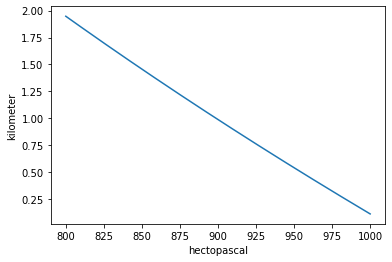

In [4]:
plt.plot(profile.pressure, profile.altitude)
plt.show()